In [61]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import concat
import pandas_datareader as data
import seaborn as sns
import matplotlib.dates as mdates

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import tensorflow

In [62]:
#creating a start date and end date
start = '2010-01-01'
end =  datetime.today().strftime("%Y-%m-%d")


company = 'AAPL'
#creating the dataframe
df= data.DataReader(company, 'yahoo', start, end)

#getting the first 5 rows and the last 5 rows
print(df.head(5))
print(df.tail(5))

df.shape

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2010-01-04  7.660714  7.585000  7.622500  7.643214  493729600.0   6.515212
2010-01-05  7.699643  7.616071  7.664286  7.656429  601904800.0   6.526478
2010-01-06  7.686786  7.526786  7.656429  7.534643  552160000.0   6.422664
2010-01-07  7.571429  7.466071  7.562500  7.520714  477131200.0   6.410791
2010-01-08  7.571429  7.466429  7.510714  7.570714  447610800.0   6.453411
                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-12-05  150.919998  145.770004  147.770004  146.630005  68826400.0   
2022-12-06  147.300003  141.919998  147.070007  142.910004  64727200.0   
2022-12-07  143.369995  140.000000  142.190002  140.940002  69721100.0   
2022-12-08  143.520004  141.100006  142.360001  142.649994  62128300.0   
2022-12-09  145.570007  140.899

(3258, 6)

In [63]:
#dropping the adj close column as it is not needed since it similar to the close column and also the date column
#df = df.reset_index()
df.head()
#df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526478
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453411


In [64]:
#checking if there are any missing datas
missing_data = df[df.isna().any(axis=1)]
print(missing_data)
print("------------------------------checking data information-------------")
df.info()
print("------------------------------checking data shape-------------")
print(df.shape)
print("------------------------------checking data description-------------")
print(df.describe())

Empty DataFrame
Columns: [High, Low, Open, Close, Volume, Adj Close]
Index: []
------------------------------checking data information-------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3258 entries, 2010-01-04 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3258 non-null   float64
 1   Low        3258 non-null   float64
 2   Open       3258 non-null   float64
 3   Close      3258 non-null   float64
 4   Volume     3258 non-null   float64
 5   Adj Close  3258 non-null   float64
dtypes: float64(6)
memory usage: 178.2 KB
------------------------------checking data shape-------------
(3258, 6)
------------------------------checking data description-------------
              High          Low         Open        Close        Volume  \
count  3258.000000  3258.000000  3258.000000  3258.000000  3.258000e+03   
mean     51.504641    50.379134    50.935750    50.963450  2.570043e+08   

Exploring the stock datasets

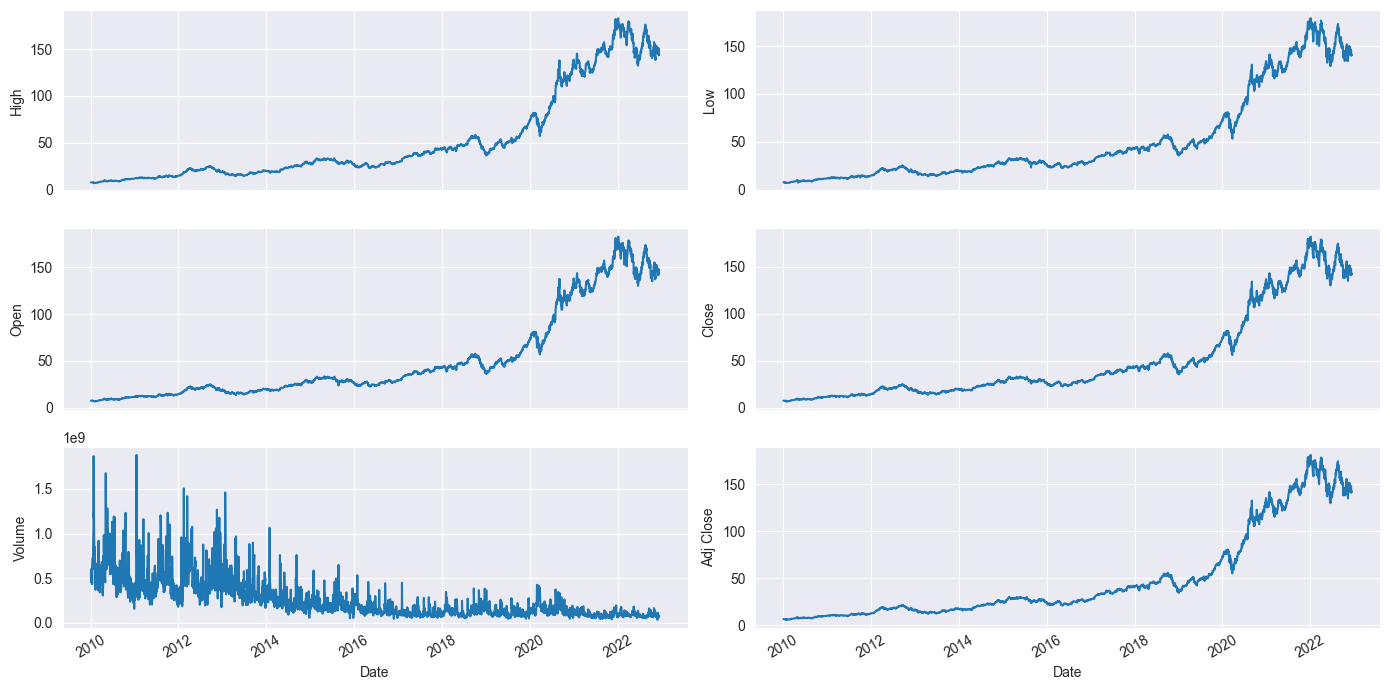

In [65]:
#Plot line charts
df_plot = df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)

        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        #ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

High         1.354497
Low          1.353588
Open         1.354436
Close        1.353896
Volume       2.031468
Adj Close    1.357262
dtype: float64
               High       Low      Open     Close    Volume  Adj Close
High       1.000000  0.999843  0.999892  0.999866 -0.495888   0.999817
Low        0.999843  1.000000  0.999866  0.999869 -0.499522   0.999804
Open       0.999892  0.999866  1.000000  0.999715 -0.497316   0.999657
Close      0.999866  0.999869  0.999715  1.000000 -0.497776   0.999942
Volume    -0.495888 -0.499522 -0.497316 -0.497776  1.000000  -0.496817
Adj Close  0.999817  0.999804  0.999657  0.999942 -0.496817   1.000000


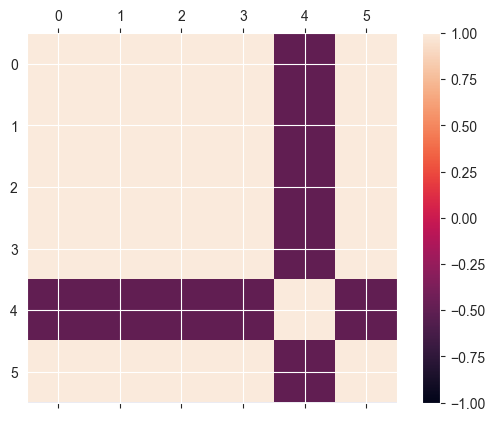

In [66]:
#checking how much skewness
print(df.skew())

#checking the correlations between the data
df_corr = df.corr(method='pearson')
print(df_corr)

#using correlation matrix plot
corr_fig = plt.figure()
axises = corr_fig.add_subplot(111)
axcorr = axises.matshow(df_corr, vmin=-1, vmax=1)

corr_fig.colorbar(axcorr)
ticks = np.arange(0,6,1)

#setting ticks for each axis
axises.set_xticks(ticks)
axises.set_yticks(ticks)

plt.show()

In [67]:
#splitting the data into training and testing
train_header = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
target_header = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(df.shape)
print(train_header.shape)
print(target_header.shape)

(3258, 6)
(2280, 1)
(978, 1)


In [68]:
#Scaling the stock data so that they fit inbetween 0 and 1
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range=(0,1))
train_header_array = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

print(train_header_array)


[[0.00447776]
 [0.00455321]
 [0.00385789]
 ...
 [0.76551674]
 [0.7752797 ]
 [0.77248217]]


In [69]:
#define how many days in the past we will look into
#the closing price of the particular day would depend on the previous days
historical_data = 50

#########################
# PREPARING TRAINING DATA
#########################
x_train = []
y_train = []

for x in range(historical_data, train_header_array.shape[0]):
    x_train.append(train_header_array[x - historical_data:x, 0])
    y_train.append((train_header_array[x, 0])) #because we are considering only one column

# turning x and y train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [70]:
# now we are going to reshape the x_train so that it works with the neural network
# the 1 indicates one additional dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [71]:
##################
# INSTANTIATE THE MODEL
##################
model = Sequential()

# now we can specify the layers - always add 1 LSTM layer and then a Dropout layer rinse/repeat the final layer is
# the Dense layer that is going to be just one unit, and it's going to the stock price prediction

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units =60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))
model.add(LSTM(units =80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))
model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))
# prediction of the next closing price
model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 50, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 50, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mae'])
epochs = 25
history=model.fit(x_train, y_train, epochs=epochs)


# Plot training & validation loss values
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

Epoch 1/25
101/101 [==============================] - 16s 73ms/step - loss: 0.0156 - mae: 0.0696
Epoch 2/25
101/101 [==============================] - 8s 75ms/step - loss: 0.0050 - mae: 0.0430
Epoch 3/25
101/101 [==============================] - 8s 75ms/step - loss: 0.0040 - mae: 0.0379
Epoch 4/25
101/101 [==============================] - 7s 73ms/step - loss: 0.0036 - mae: 0.0339
Epoch 5/25
101/101 [==============================] - 8s 75ms/step - loss: 0.0041 - mae: 0.0379
Epoch 6/25
101/101 [==============================] - 8s 76ms/step - loss: 0.0037 - mae: 0.0360
Epoch 7/25
101/101 [==============================] - 8s 77ms/step - loss: 0.0028 - mae: 0.0309
Epoch 8/25
101/101 [==============================] - 8s 78ms/step - loss: 0.0028 - mae: 0.0305
Epoch 9/25
101/101 [==============================] - 8s 75ms/step - loss: 0.0030 - mae: 0.0302
Epoch 10/25
101/101 [==============================] - 7s 74ms/step - loss: 0.0028 - mae: 0.0299
Epoch 11/25
101/101 [=================

SAVE THE MODEL SO IT WOULD BE USEFUL IN STREAMLIT

In [ ]:

model.save('new_lstm_model.h5')

In [ ]:
# LOAD THE DATA - it has to be data the model has not seen before
# this is the time range of the data - we have the data but the model has never seen that data
# so this is a perfect way to see how well it performs
_start = '2010-01-01'
_end = datetime.today().strftime("%Y-%m-%d")
_data = data.DataReader(company,  'yahoo', _start, _end)

In [ ]:
#getting the actual prices
# we need to scale prices, we need to concatenate the full data set that we want to predict on
# this is NOT the predicted price, but the real price from the market
actual_prices = _data['Close'].values

In [ ]:
# this will combine the training data and the test data
total_dataset = pd.concat((df['Close'], _data['Close']), axis=0)


In [ ]:
# this is what our model is going to see as an input, so it can predict
model_inputs = total_dataset[len(total_dataset) - len(_data) - historical_data:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


MAKE PREDICTIONS ON TEST DATA

In [ ]:
###############################
# MAKE PREDICTIONS ON TEST DATA
###############################

# we don't use the y_test because we already have the stock prices
x_test = []
y_test = []

for x in range(historical_data, len(model_inputs)):
    x_test.append(model_inputs[x - historical_data:x, 0])
    y_test.append(model_inputs[i, 0])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [ ]:
# now let's predict on the x_test data,the predicted prices are now going to be scaled, so we need to reverse scale them or rather inverse_transform them
y_pred = model.predict(x_test)
# now we are back to the actual predicted price, non-scaled
y_pred = scaler.inverse_transform(y_pred)

# now let plot the predictions instead of just numbers.
plt.plot(actual_prices, color="red", label=f"Actual {company} Price")
plt.plot(y_pred, color="blue", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()

plt.savefig('Prediction_test.svg')

plt.show()

EVALUATING THE MODEL PERFORMANCES

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#evaluate the model
mae = mean_absolute_error(actual_prices, y_pred)
mse = mean_squared_error(actual_prices, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, y_pred)



#printing the model evaluation values
print('mae:  {:.2f}'.format(mae))
print('Root mean square error:  {:.2f}'.format(rmse))
print('R2 score: ', r2)




Making Predictions for Next day

In [ ]:
#########################
# PREDICTING OUR NEXT DAY
#########################

final_data = [model_inputs[len(model_inputs) + 1 - historical_data:len(model_inputs + 1), 0]]
final_data = np.array(final_data)
final_data = np.reshape(final_data, (final_data.shape[0], final_data.shape[1], 1))

print(scaler.inverse_transform(final_data[-1]))

Next_day = model.predict(final_data)
Next_day  = scaler.inverse_transform(Next_day)
print(f' Price Prediction for {company} tomorrow would be: {Next_day}')